In [ ]:
#Now the dataset is to analyze the perfarmance of the student on factors like the course
# completion and parents education
#Source-->https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams





In [1]:
#Import the pandas library
import pandas as pd
df=pd.read_csv("//content/archive (6).zip")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82


In [2]:
#To find the total number of cells
df.size

8000

In [3]:
#To find the number of rows and columns
df.shape

(1000, 8)

In [4]:
# Total information in brief
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
#To know number of students completed their courses
df['test preparation course'].value_counts()

none         665
completed    335
Name: test preparation course, dtype: int64

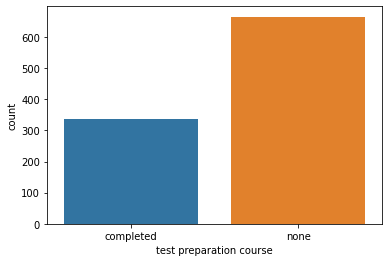

In [6]:
#Import seaborn library 
import seaborn as sns
sns.countplot(x='test preparation course',data=df)

In [7]:
#Among 1000 students 335 are completed their course
#And 665 students are not completed their course

In [8]:
#To know number of male and female students
df['gender'].value_counts()

male      517
female    483
Name: gender, dtype: int64

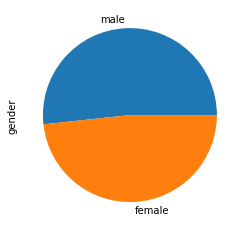

In [9]:
df['gender'].value_counts().plot(kind="pie")

In [10]:
#To know number of male and female students completed their course
df.groupby(['gender','test preparation course']).size()

gender  test preparation course
female  completed                  160
        none                       323
male    completed                  175
        none                       342
dtype: int64

In [11]:
#To know the childrens parents education level
df.groupby('parental level of education').size()

parental level of education
associate's degree    203
bachelor's degree     112
high school           202
master's degree        70
some college          222
some high school      191
dtype: int64

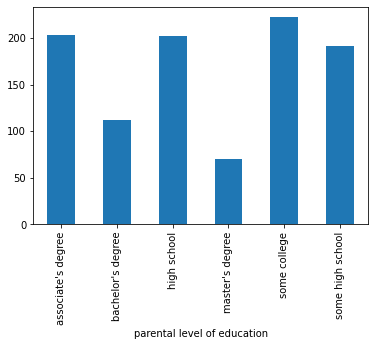

In [12]:
# Barplot is plotted 
df.groupby('parental level of education').size().plot(kind='bar')

In [13]:
#From these we can analyse that many of the parents are well educated

In [14]:
#Here our main goal is to determine preparation of course and marks are dependent or not
#To get only the course completion and scores of the student from the dataframe
df1=df.iloc[:,4:8]
df1

,test preparation course,math score,reading score,writing score
0,completed,67,67,63
1,none,40,59,55
2,none,59,60,50
3,none,77,78,68
4,completed,78,73,68
...,...,...,...,...
995,none,73,70,65
996,completed,85,91,92
997,none,32,35,41
998,none,73,74,82


In [15]:
#Finding the mean of the student marks
mean=df1.mean(axis=1)
mean

<ipython-input-15-c357e9cf6f95>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean=df1.mean(axis=1)


0      65.666667
1      51.333333
2      56.333333
3      74.333333
4      73.000000
         ...    
995    69.333333
996    89.333333
997    36.000000
998    76.333333
999    62.333333
Length: 1000, dtype: float64

In [16]:
#To obtain the average marks of the students and their course completion status
df1=pd.concat([df1['test preparation course'],mean],axis=1)
df1

,test preparation course,0
0,completed,65.666667
1,none,51.333333
2,none,56.333333
3,none,74.333333
4,completed,73.000000
...,...,...
995,none,69.333333
996,completed,89.333333
997,none,36.000000
998,none,76.333333


In [21]:
#To get the maximum marks of average
mean.max()

100.0

In [ ]:
#To know the maximum markes got by a student whether he completed test 
#preparation course or not
pd.concat([df1['test preparation course'],mean],axis=1).max()

test preparation course     none
0                          100.0
dtype: object

In [ ]:
#Hence we can say that preparation not only plays a role in maximum scoring

In [ ]:
#Minumam average marks students 
pd.concat([df1['test preparation course'],mean],axis=1).min()

test preparation course    completed
0                          21.666667
dtype: object

In [ ]:
#Even a student after completed a course, he can't able to get the good marks

In [ ]:
#Checking whether the parents education qualification impacts on the student
pd.concat([df['parental level of education'],mean],axis=1).min()

parental level of education    associate's degree
0                                       21.666667
dtype: object

In [ ]:
#And also we can see that parents educational qualification also doesn't shows
# an much inpact on students education 

In [ ]:
#Knowing the maximum scored parents educational qualification
pd.concat([df['parental level of education'],mean],axis=1).max()

parental level of education    some high school
0                                         100.0
dtype: object

In [ ]:
#Finally we can conclude that there is not that much of impact of students score 
#on parents education and the course completion